# Kruskal Algorithm
1. <span style="font-size: 1.3rem">Sort all the edges in non-decreasing order of their weight.</span>
2. <span style="font-size: 1.3rem">Pick the smallest edge. Check if it forms a cycle with the spanning tree formed so far.<br/>If the cycle is not formed, include this edge. Else, discard it.</span>
3. <span style="font-size: 1.3rem">Repeat step-2 until there are $(V-1)$ edges in the spanning tree.</span>
# Graph visualization class

In [1]:
import networkx as nx 
import matplotlib.pyplot as plt 

# Defining a Class 
class GraphVisualization: 

    def __init__(self, weighted, edge_list = [], adjancency_matrix = [], isDirected = False): 
        self.weighted = weighted
        self.G = (nx.DiGraph() if isDirected else nx.Graph())
        
        if len(edge_list) > 0:
            for i in edge_list:
                self.G.add_edge(chr(i[0] + 65), chr(i[1] + 65), weight = i[2])
        
        elif len(adjancency_matrix) > 0:
            for i in range(len(adjancency_matrix)):
                for j in range(len(adjancency_matrix[i])):
                    if adjancency_matrix[i][j] <= 0: continue
                    self.G.add_edge(chr(i + 65), chr(j + 65), weight = adjancency_matrix[i][j])
        
        elif len(edge_list) == 0 and len(adjancency_matrix) == 0:
            raise Exception("I expect atleast an edge-list or an adjancency matrix")
    
    # In visualize function G is an object of 
    # class Graph given by networkx G.add_edges_from(visual) 
    # creates a graph with a given list 
    # nx.draw_networkx(G) - plots the graph 
    # plt.show() - displays the graph 
    def visualize(self):
        pos = nx.spring_layout(self.G, scale = 5000)

        # Manually scale up the positions for more spacing
        for key in pos:
            pos[key] *= 10000
        nx.draw_networkx(self.G, pos, node_size=700, node_color='#00ccff', font_size=10)

        if self.weighted:
            # Draw edge labels for weights
            labels = nx.get_edge_attributes(self.G, 'weight')
            nx.draw_networkx_edge_labels(self.G, pos, edge_labels=labels)
        plt.show()

## Function to convert from edge-list to adjancency-matrix

In [2]:
def edge_list_to_adjacency_matrix(edge_list, directed=False):
    # get number of vertices
    s = set()
    for i in edge_list:
        s.add(i[0]); s.add(i[1])
    num_vertices = len(s)
    s = list(s)
    # Initialize an n x n matrix with all 0's
    adj_matrix = [[0 for _ in range(num_vertices)] for _ in range(num_vertices)]
    
    # Iterate through each edge in the edge list
    for edge in edge_list:
        u, v = edge[:2]  # Get the vertices of the edge
        adj_matrix[s.index(u)][s.index(v)] = edge[2]  # Mark edge u -> v with 1 (or edge weight if any)
        
        if not directed:
            adj_matrix[s.index(v)][s.index(u)] = edge[2]  # For undirected graphs, also mark edge v -> u
        else: adj_matrix[s.index(v)][s.index(u)] = -edge[2]
    
    return adj_matrix

## Class to check for loops in the graph

In [3]:
class helper:
    def __init__(self):
        self.v_arr = []

    def check_loop(self, a_matrix: list, index = 0, prev_vertex = 0) -> bool:
        if index in self.v_arr: return True
        self.v_arr.append(index)
        for i in range(len(a_matrix[index])):
            if a_matrix[index][i] > 0 and i != prev_vertex:
                isLoop = False or self.check_loop(a_matrix, i, index)
                if isLoop: return True
        return False

### This is the graph we will be using for our example

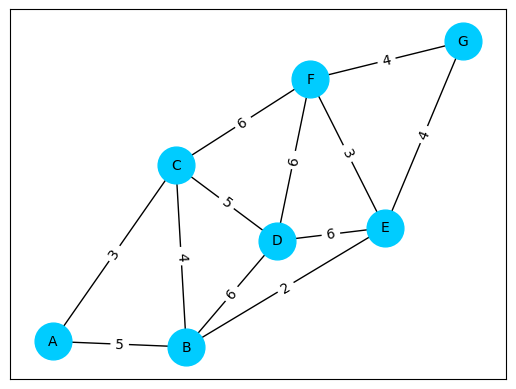

In [5]:
edgeList = [
    (0, 1, 5),
    (0, 2, 3),
    (1, 2, 4),
    (1, 3, 6),
    (2, 3, 5),
    (2, 5, 6),
    (3, 5, 6),
    (3, 4, 6),
    (4, 5, 3),
    (4, 6, 4),
    (5, 6, 4),
    (1, 4, 2)
]
G = GraphVisualization(weighted = True, edge_list = edgeList)
G.visualize()

## Adjancency matrix of the graph

In [6]:
edge_list_to_adjacency_matrix(edgeList)

[[0, 5, 3, 0, 0, 0, 0],
 [5, 0, 4, 6, 2, 0, 0],
 [3, 4, 0, 5, 0, 6, 0],
 [0, 6, 5, 0, 6, 6, 0],
 [0, 2, 0, 6, 0, 3, 4],
 [0, 0, 6, 6, 3, 0, 4],
 [0, 0, 0, 0, 4, 4, 0]]

## Sorting the edges based on their cost

In [7]:
sorted_edges = sorted(edgeList, key = lambda x: x[2])
for edge in sorted_edges:
    print(f'{chr(edge[0] + 65)} -- {edge[2]} --> {chr(edge[1] + 65)}')

B -- 2 --> E
A -- 3 --> C
E -- 3 --> F
B -- 4 --> C
E -- 4 --> G
F -- 4 --> G
A -- 5 --> B
C -- 5 --> D
B -- 6 --> D
C -- 6 --> F
D -- 6 --> F
D -- 6 --> E


## Kruskal Algorithm driver code

In [8]:
def kruskal_MST(edges):
    stack = [edges[0]]
    for i in range(1, len(edges)):
        stack.append(edges[i])
        if helper().check_loop(edge_list_to_adjacency_matrix(stack)):
            stack.pop()
    return stack

In [9]:
mst = kruskal_MST(sorted_edges)
for edge in mst:
    print(f'{chr(edge[0] + 65)} -- {edge[2]} --> {chr(edge[1] + 65)}')

B -- 2 --> E
A -- 3 --> C
E -- 3 --> F
B -- 4 --> C
E -- 4 --> G
C -- 5 --> D


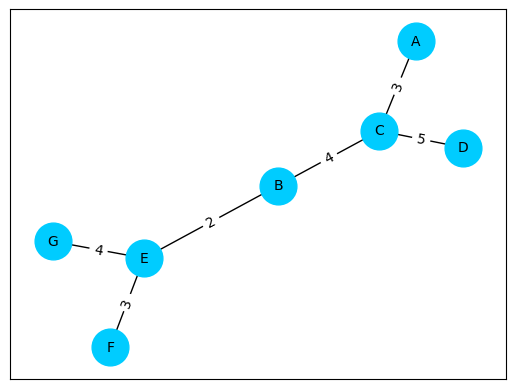

In [11]:
G5 = GraphVisualization(weighted = True, edge_list = mst)
G5.visualize()

## Total cost of MST

In [12]:
print(f"Total cost of MST = {sum([i[2] for i in mst])}")

Total cost of MST = 21


***